# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
from random import random, seed
from itertools import product
import numpy as np

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [48]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10* DENSITY)]))

In [49]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.power(SETS.sum(axis=1), 1.1)

## Helper Functions

In [50]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution])) # phenotype


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

SIMULATED ANNEALING

In [51]:
def multiple_mutationtweak(solution: np.ndarray, strength: float) ->np.ndarray:
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)]=True
    new_sol=np.logical_xor(solution,mask)
    return new_sol
    

In [52]:
def fitness(solution:np.ndarray):
   return (valid(solution), -cost(solution))

In [53]:
from matplotlib import pyplot as plt
from itertools import accumulate


ic| fitness(solution): (True, -360830648.3086334)


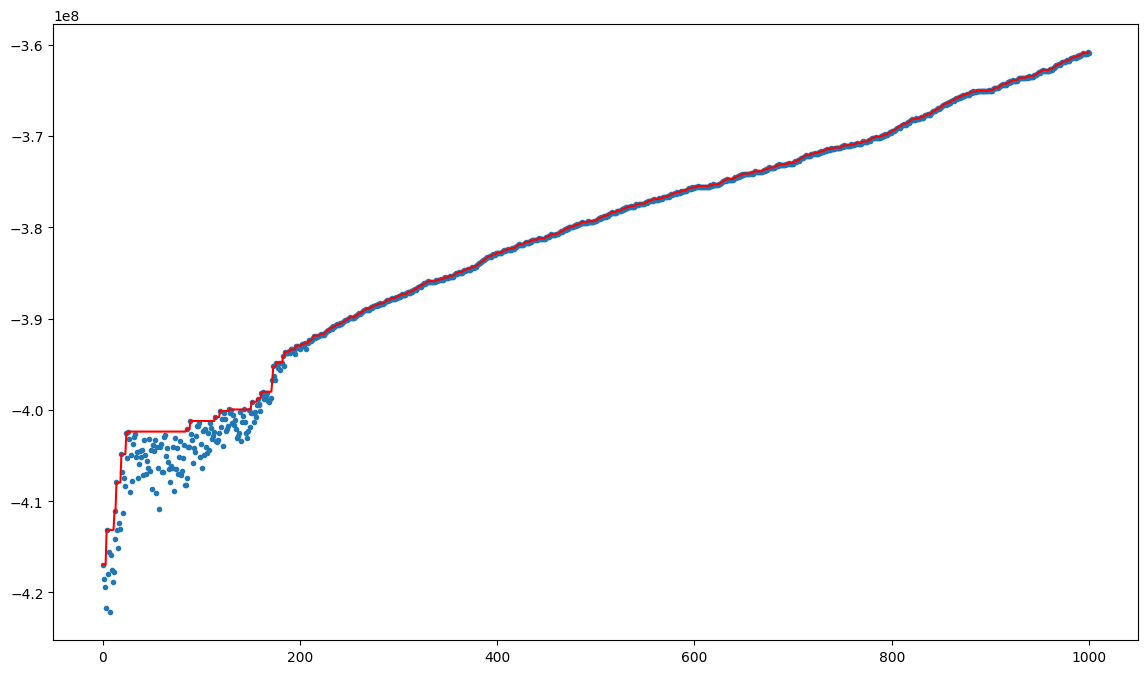

In [55]:
solution=rng.random(NUM_SETS) < 0.5
while not valid(solution):
    solution=rng.random(NUM_SETS) < 0.5 # start from a valid initial solution
solution_fitness=fitness(solution)
history = [float(solution_fitness[1])]
temp_history = []


tweak = multiple_mutationtweak

temperature = 5
strength = 0.3

for steps in range(1000):
    new_solution = tweak(solution, strength)
    f =  fitness(new_solution)
    history.append(float(f[1]))
    global new_temperature
    if valid(new_solution):
        
        if f[1] > solution_fitness[1]:
            solution = new_solution
            solution_fitness = fitness(solution)
            strength *= 0.8
            new_temperature = temperature

        else: 
            diff = f[1] - solution_fitness[1]
            #ic(diff)
            if np.random.rand() < np.exp(diff / temperature): # simulated annealing
                solution = new_solution
                solution_fitness = fitness(solution)
                new_temperature = temperature * 0.9
                strength *=1.2

        temperature = new_temperature

        if temperature < 0.01:
            break

ic(fitness(solution))
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
